# Visualizing ZDF files

This notebook can be used to quickly visualize ZDF files.

## Main routines

### Grid data

* `grid2d` - Open a `.zdf` grid file and produce a 2D (colormap) plot
* `vfield2d` - Open a 2 grid files and produce a field magnitude plot

### Particle data

* `part2D` - Open a `.zdf` particle file and produce a 2D (scatter) plot with the selected quantities
* `histogram` - Open a `.zdf` particle file and produce a histogram plot of the selected quantity

## Example

Visualize file `test-000000.zdf`:

```python
import visxd
visxd.grid2d( "test-000000.zdf" )
```


## Utilities

The following routines are meant to simplify access to specific quantities / timesteps:

* `plot_data( fld, iter, ...)` - Plots 1D / 2D scalar data. The parameter `fld` correponds to the complete file path up to the '-' character that separates the iteration number, e.g. "EMF/Jx".
* `plot_vfield2d( fld, iter, ...)` - Generates 2 plots, 1 for the magnitude of the in-plane field and another one for the out of plane field. The parameter `fld` correponds to the complete file path up to the character that specifies the field component, just befor the '-' character separates the iteration number, e.g. "EMF/B".

The iteration parameter, `iter`, will be converted to a six digit string of the usual format to create the complete file name. The routines also accept additional parameters that are passed on to the `visxd` backend, e.g.:

```python
plot_vfield2d( "EMF/E", xlim = (0., 2.))
```

In [1]:
import visxd

import os.path
import sys

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]

import matplotlib.colors as colors




In [ ]:
import visxd
visxd.plot_data("CHARGE/electrons/electrons-charge", 0)

## Species Boundary conditions

In [1]:
import visxd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]

import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
from IPython.display import display

xlim = None

In [4]:
xlim = None
ylim = None

@widgets.interact(
    species=['cathode'], iter=(0, 700, 50))
def view(species = 'cathode', iter = 0):
    src = "CHARGE/" + species + "/" + species + "-charge"
    visxd.plot_data(src, iter, xlim = xlim, ylim = ylim  )

interactive(children=(Dropdown(description='species', options=('cathode',), value='cathode'), IntSlider(value=…

In [ ]:
@widgets.interact(
    iter=(0, 700, 50)
)
def view(iter = 0):
    src = "EMF/Ex"
    visxd.plot_data(src, iter, xlim = xlim  )

In [5]:
@widgets.interact(
    iter=(0, 700, 50)
)
def view(iter = 0):
    src = "CURRENT/Jx"
    visxd.plot_data(src, iter, xlim = xlim  )

interactive(children=(IntSlider(value=0, description='iter', max=700, step=50), Output()), _dom_classes=('widg…

In [ ]:
visxd.part2D( "PARTICLES/cathode/particles-cathode-000400.zdf", "x", "y", xlim=[100,104], ylim = [250,256])

In [ ]:
! make && ./zpic-cuda

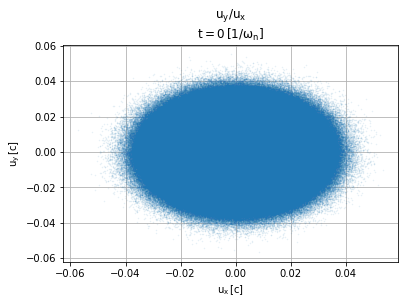

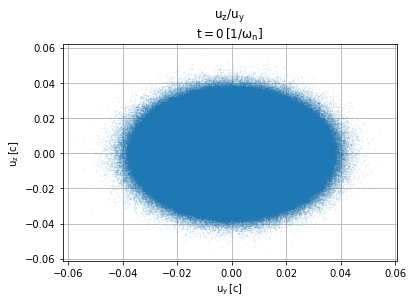

In [7]:
visxd.part2D( "PARTICLES/electrons/particles-electrons-000000.zdf", "ux", "uy", alpha = 0.1 )

visxd.part2D( "PARTICLES/electrons/particles-electrons-000000.zdf", "uy", "uz", alpha = 0.1 )

Plotting CURRENT/J in plane field for iteration 500.


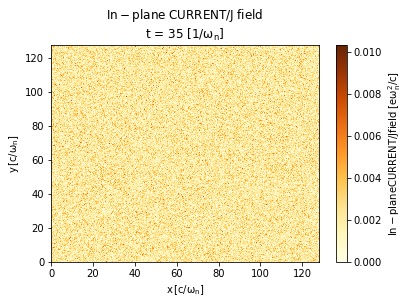

Plotting CURRENT/J out of plane field for iteration 500.


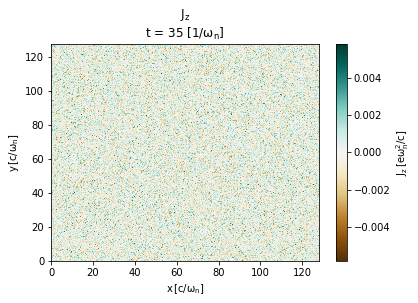

In [10]:
visxd.plot_vfield2d("CURRENT/J", 500 )

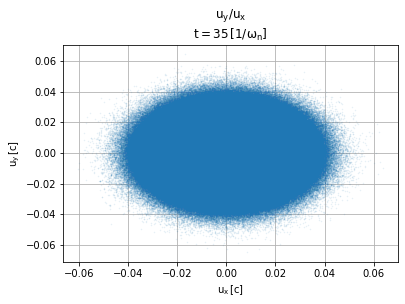

In [11]:
visxd.part2D( "PARTICLES/electrons/particles-electrons-000500.zdf", "ux", "uy", alpha = 0.1 )